In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import os
import shutil
import logging
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image,display

## Data Preparation 
### Organizing train,val and test folder location

In [52]:
def prepare_trainfolder_for_imagedatagenerator(train_data_path="E:\Jupyter\Customer Use-cases\Image Processing\Sample\\1. Cats vs Dogs\\data\\train"):
    list_dog_fns = []
    list_cat_fns = []
    train_data_path = "E:\Jupyter\Customer Use-cases\Image Processing\Sample\\1. Cats vs Dogs\\data\\train"
    os.mkdir(train_data_path+"\\cat")
    os.mkdir(train_data_path+"\\dog")
    os.chdir("E:\\Jupyter")
    list_fns = os.listdir(train_data_path)
    dog_counter = 0
    cat_counter = 0
    for file in os.listdir(train_data_path):
        try:
            if file.split(".")[2] == "jpg":
                if file.split(".")[0]=="dog":
                    list_dog_fns.append(file)
                    try:
                        shutil.move(train_data_path+"\\"+file, train_data_path+"\\dog\\"+file.split(".")[1]+".jpg")
                        dog_counter = dog_counter + 1
                        print("Success, dog#", dog_counter)
                    except Exception as e:
                        print("Could not copy: ",file)
                        print("Error: ", e)
                        break
                elif file.split(".")[0]=="cat":
                    list_cat_fns.append(file)
                    try:
                        shutil.move(train_data_path+"\\"+file, train_data_path+"\\cat\\"+file.split(".")[1]+".jpg")
                        cat_counter = cat_counter + 1
                        print("Success, cat#", cat_counter)
                    except Exception as e:
                        print("Could not copy: ",file)
                        print("Error: ",e)
                        break
        except:
            print(file)
            pass

In [53]:
def prepare_valfolder_for_imagedatagenerator(root_dir = "E:\Jupyter\Customer Use-cases\Image Processing\Sample\\1. Cats vs Dogs\\data"):
    root_dir = "E:\Jupyter\Customer Use-cases\Image Processing\Sample\\1. Cats vs Dogs\\data"
    val_dir = os.path.join(root_dir, "validation")
    os.mkdir(val_dir)

    #For cat directory
    train_cat_dir = os.path.join(os.path.join(root_dir,"train"),"cat")
    val_cat_dir = os.path.join(os.path.join(root_dir,"validation"),"cat")
    try:
        os.mkdir(val_cat_dir)
    except:
        pass

    random_cat_list = random.sample(range(12500),int(0.2*12500))
    for num in random_cat_list:
        src = os.path.join(train_cat_dir,str(num))+".jpg"
        dst = os.path.join(val_cat_dir,str(num))+".jpg"
        shutil.copy(src,dst)
        os.remove(src)

    #For dog directory
    train_dog_dir = os.path.join(os.path.join(root_dir,"train"),"dog")
    val_dog_dir = os.path.join(os.path.join(root_dir,"validation"),"dog")
    os.mkdir(val_dog_dir)

    random_dog_list = random.sample(range(12500),int(0.2*12500))
    for num in random_dog_list:
        src = os.path.join(train_dog_dir,str(num))+".jpg"
        dst = os.path.join(val_dog_dir,str(num))+".jpg"
        shutil.copy(src,dst)
        os.remove(src)

In [55]:
#Call this function only when you have train directory full of cats and dogs images and 
#you want to create subdirectories within train
#prepare_trainfolder_for_imagedatagenerator(train_data_path="E:\Jupyter\Customer Use-cases\Image Processing\Sample\\1. Cats vs Dogs\\data\\train")
prepare_valfolder_for_imagedatagenerator(root_dir = "E:\Jupyter\Customer Use-cases\Image Processing\Sample\\1. Cats vs Dogs\\data")

## Data Exploration

### 1. Lets look at some sample images

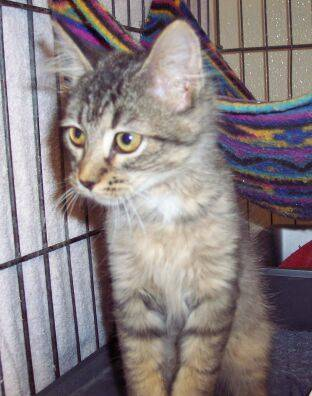

In [59]:
display(Image("E:\Jupyter\Customer Use-cases\Image Processing\Sample\\1. Cats vs Dogs\\data\\validation\\cat\\2.jpg",format='jpg'))

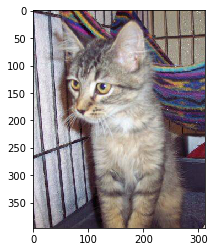

In [60]:
img_path = "E:\Jupyter\Customer Use-cases\Image Processing\Sample\\1. Cats vs Dogs\\data\\validation\\cat\\2.jpg"
img = mpimg.imread(img_path)
plt.imshow(img)

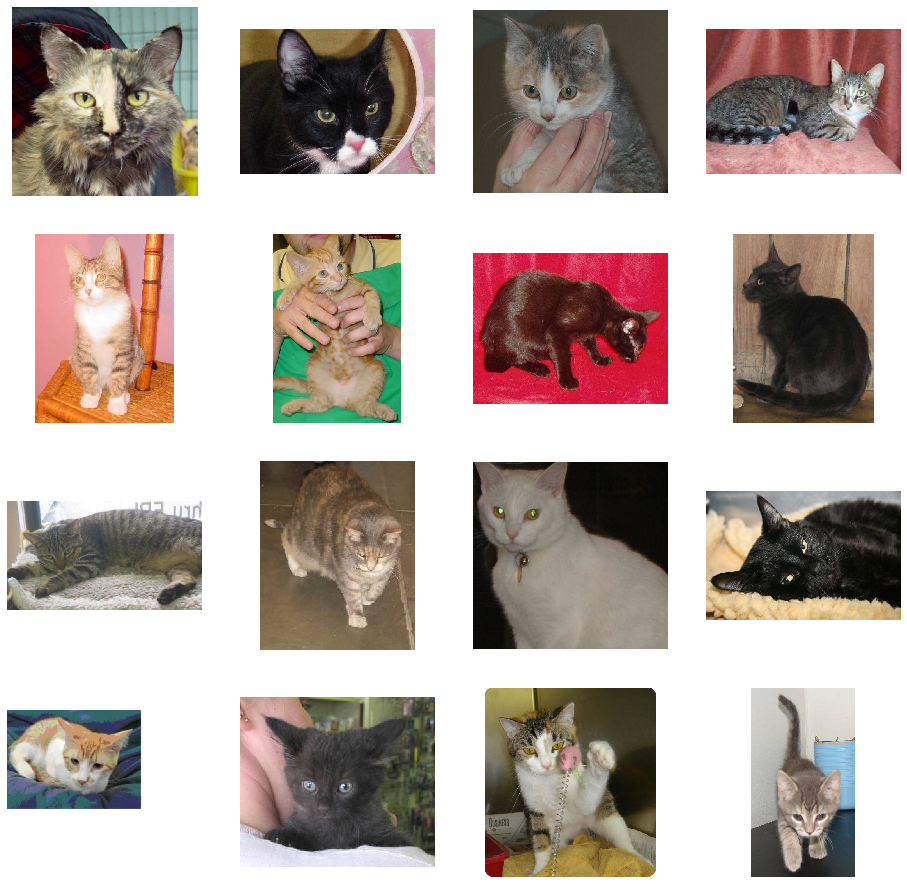

In [61]:
nrows, ncols = 4,4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
val_cat_dir = "E:\Jupyter\Customer Use-cases\Image Processing\Sample\\1. Cats vs Dogs\\data\\validation\\cat"

for i,fname in enumerate(os.listdir(val_cat_dir)):
    if(i>15):
        break
    else:
        sp = plt.subplot(nrows, ncols,i+1)
        sp.axis("Off")
        img = mpimg.imread(os.path.join(val_cat_dir,fname))
        plt.imshow(img)
plt.show()

## 3.Data Pipeline (Preparation)

In [62]:
import numpy as np
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [121]:
image_size = 150
batch_size = 10

In [142]:
train_data_gen = ImageDataGenerator(rescale = 1./255)
train_img_paths = "E:\\Jupyter\\Customer Use-cases\\Image Processing\\Sample\\1. Cats vs Dogs\\data\\train"

train_generator = train_data_gen.flow_from_directory(train_img_paths, \
                                                     target_size =(image_size, image_size),\
                                                     batch_size=batch_size, \
                                                     class_mode="binary")

Found 20000 images belonging to 2 classes.


In [143]:
val_data_gen = ImageDataGenerator(rescale = 1./255)
validation_img_paths = "E:\\Jupyter\\Customer Use-cases\\Image Processing\\Sample\\1. Cats vs Dogs\\data\\validation"
validation_generator = val_data_gen.flow_from_directory(validation_img_paths, \
                                                     target_size =(image_size, image_size),\
                                                     batch_size=batch_size, \
                                                     class_mode="binary")

Found 5000 images belonging to 2 classes.


## 4.Model Building

In [144]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, Activation, MaxPooling2D
from tensorflow.python.keras.utils.data_utils import Sequence

In [145]:
model = Sequential()
#First Layer
model.add(Conv2D(32,(3,3),input_shape=(image_size,image_size,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [146]:
#Second Layer
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [147]:
#Third Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [148]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [149]:
model.compile(loss="binary_crossentropy",\
             optimizer="rmsprop",\
             metrics=["accuracy"])

In [150]:
model.fit_generator(\
                   train_generator,\
                   steps_per_epoch = 400/batch_size,\
                   epochs = 50,\
                   validation_data=validation_generator,\
                   validation_steps=5000/batch_size)

Epoch 1/50
40/40 [==============================] - 78s 2s/step - loss: 0.8019 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/50
40/40 [==============================] - 79s 2s/step - loss: 0.6999 - accuracy: 0.5075 - val_loss: 0.6909 - val_accuracy: 0.5098
Epoch 3/50
40/40 [==============================] - 80s 2s/step - loss: 0.6951 - accuracy: 0.5475 - val_loss: 0.6814 - val_accuracy: 0.6282
Epoch 4/50
40/40 [==============================] - 143s 4s/step - loss: 0.6769 - accuracy: 0.5950 - val_loss: 0.8892 - val_accuracy: 0.5026
Epoch 5/50
40/40 [==============================] - 133s 3s/step - loss: 0.6842 - accuracy: 0.6100 - val_loss: 0.6913 - val_accuracy: 0.5240
Epoch 6/50
40/40 [==============================] - 103s 3s/step - loss: 0.6824 - accuracy: 0.5825 - val_loss: 0.6556 - val_accuracy: 0.6340
Epoch 7/50
40/40 [==============================] - 79s 2s/step - loss: 0.6811 - accuracy: 0.5600 - val_loss: 0.6950 - val_accuracy: 0.6156
Epoch 8/50
40/40 

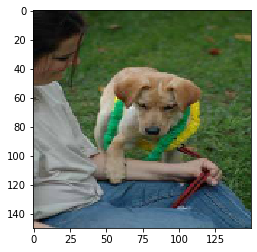

In [195]:
img_height = image_size
img_width = image_size
img_test1 = load_img("E:\\Jupyter\\Customer Use-cases\\Image Processing\\Sample\\1. Cats vs Dogs\\data\\test\\6315.jpg",\
                     target_size=(img_height, img_width))
plt.imshow(img_test1)
img_arr = img_to_array(img_test1)
img_arr1=img_arr.reshape((1,150,150,3))

In [196]:
if model.predict(img_arr1)[0] <0.5:
    print("Its a cat")
else:
    print("Its a dog")
print(model.predict(img_arr1)[0])

Its a dog
[0.99999654]


In [197]:
from tensorflow.keras.models import Model

In [198]:
list_output = [layer.output for layer in model.layers]

In [199]:
activation_model = Model(inputs = model.input, outputs=list_output)

In [200]:
activations = activation_model.predict(img_arr1)

In [201]:
len(activations)

15

In [212]:
activations[0].shape

(1, 148, 148, 32)

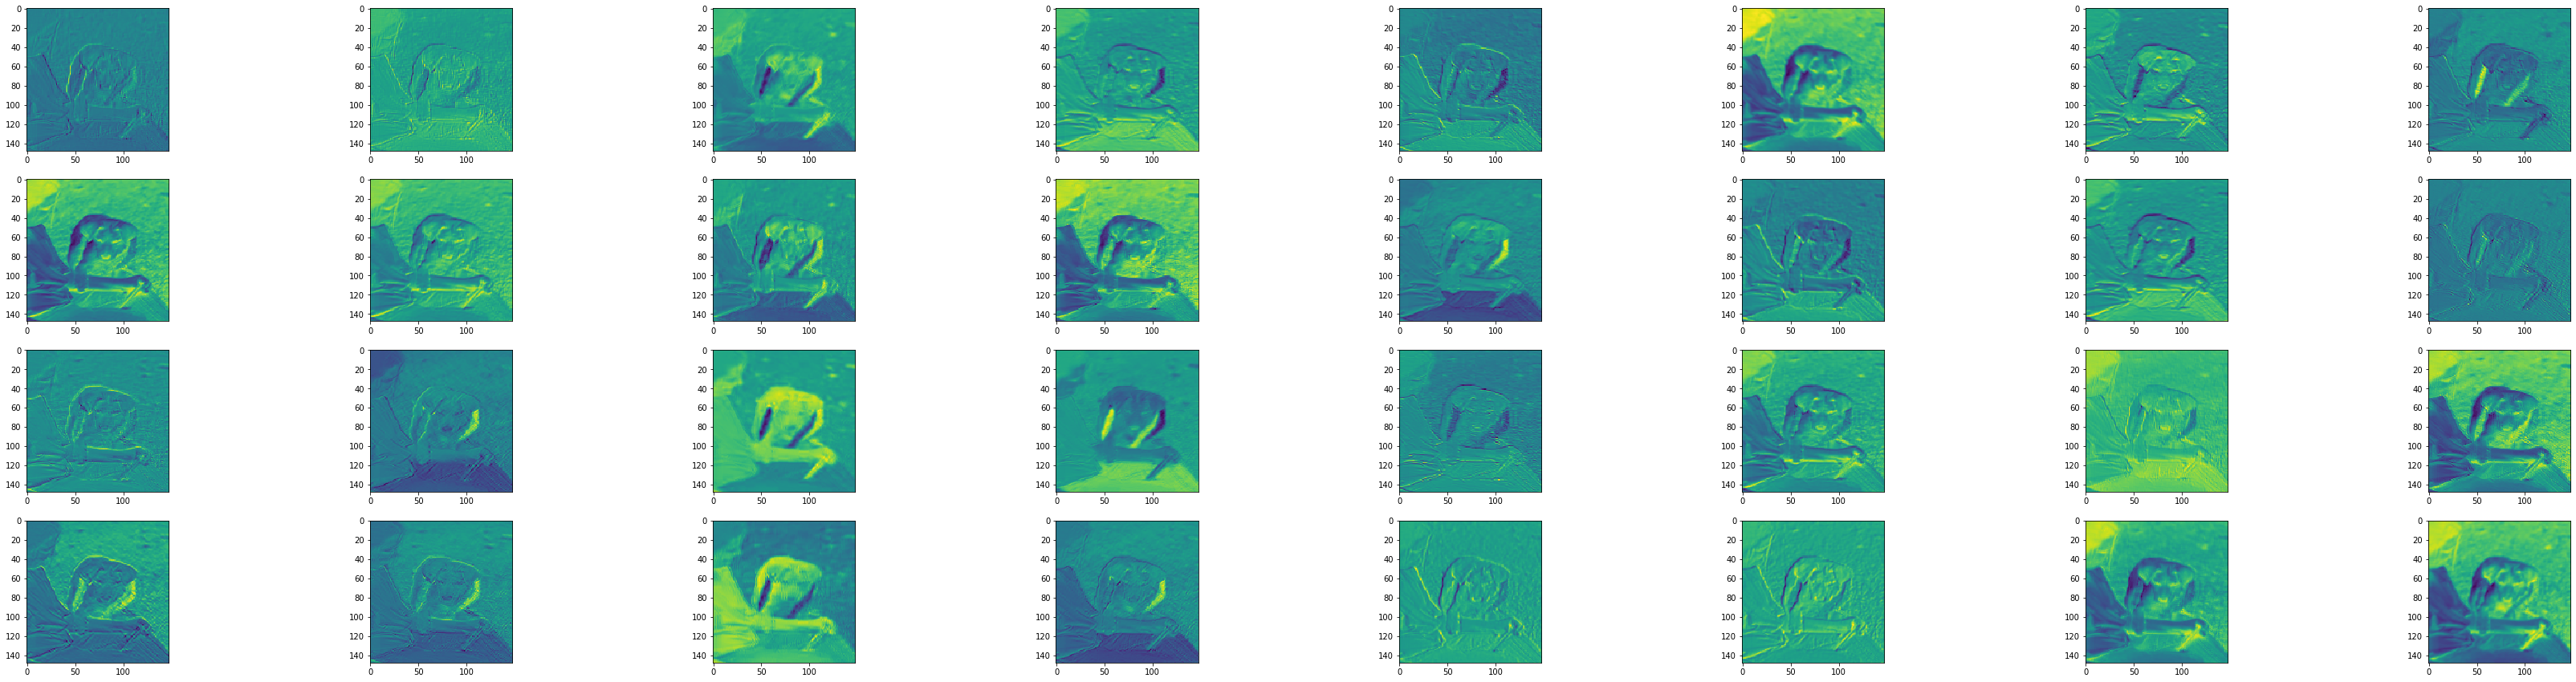

In [216]:
img_activation = activations[0]
fig, ax = plt.subplots(4,8, figsize=(60,15))
count=0
for i in range(4):
    for j in range(8):
        if count==32:
            break
        ax[i,j].imshow(img_activation[0,:,:,count])
        count=count+1

In [217]:
activations[1].shape

(1, 148, 148, 32)

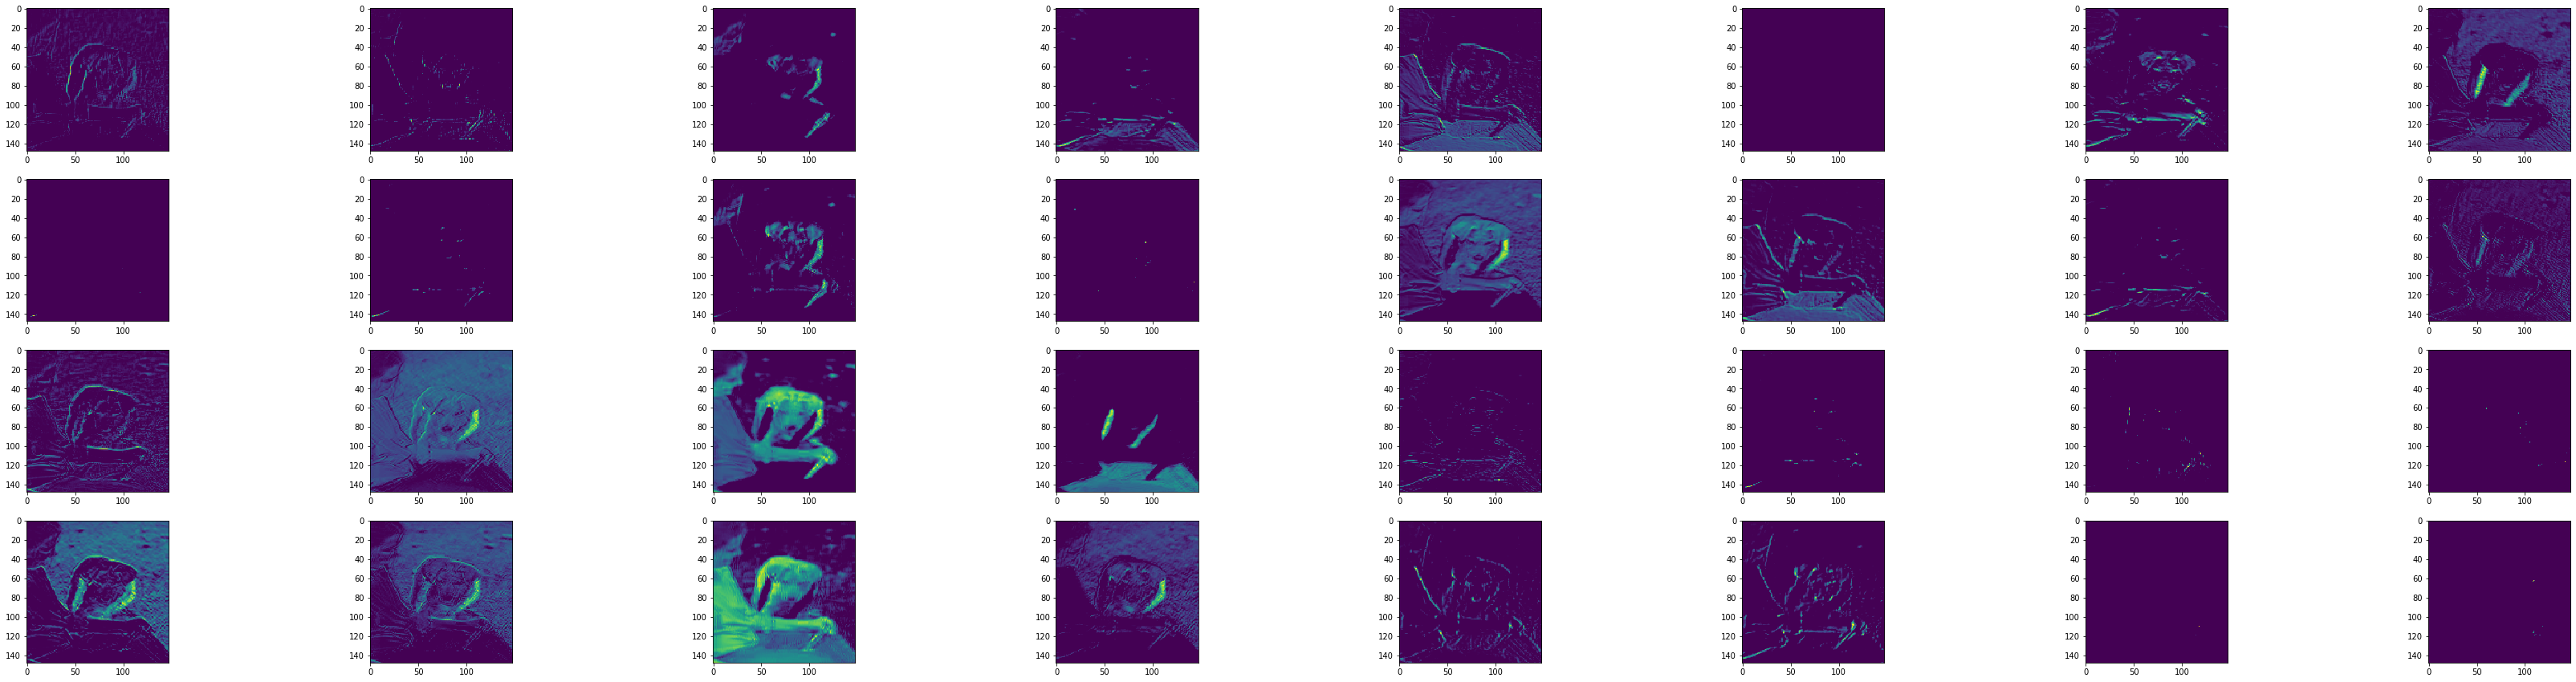

In [218]:
img_activation = activations[1]
fig, ax = plt.subplots(4,8, figsize=(60,15))
count=0
for i in range(4):
    for j in range(8):
        if count==32:
            break
        ax[i,j].imshow(img_activation[0,:,:,count])
        count=count+1

In [219]:
activations[2].shape

(1, 74, 74, 32)

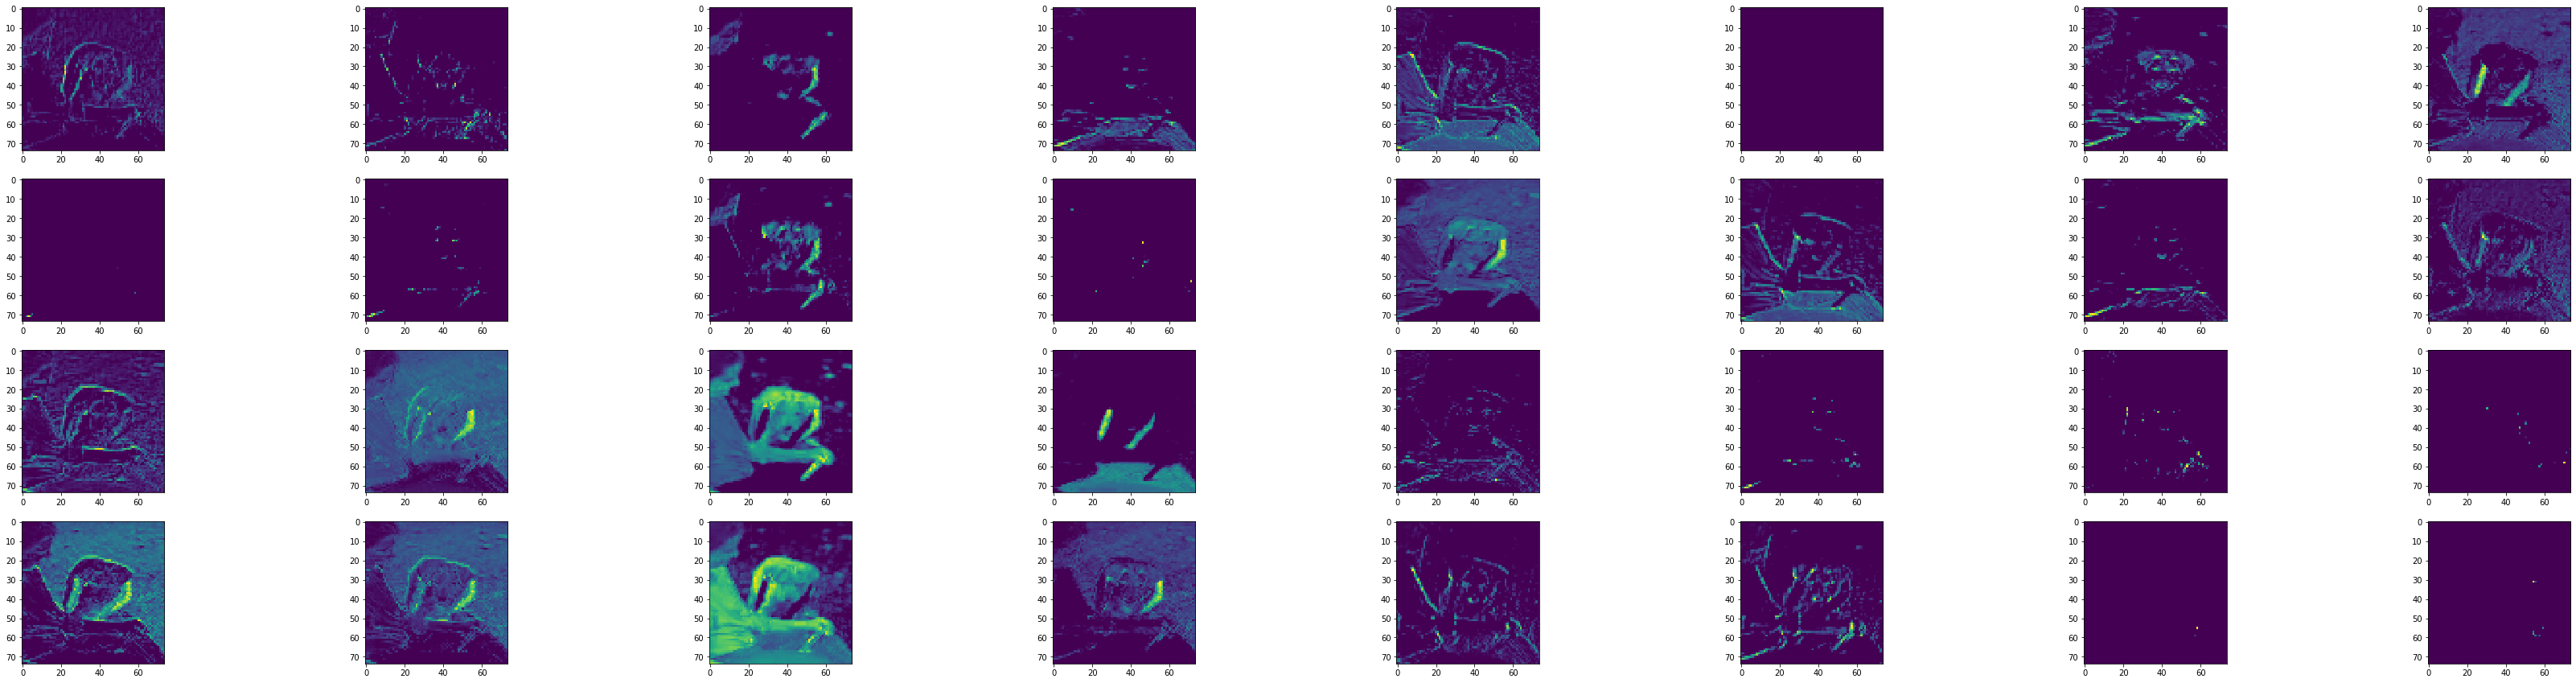

In [220]:
img_activation = activations[2]
fig, ax = plt.subplots(4,8, figsize=(60,15))
count=0
for i in range(4):
    for j in range(8):
        if count==32:
            break
        ax[i,j].imshow(img_activation[0,:,:,count])
        count=count+1

In [221]:
activations[3].shape

(1, 72, 72, 32)

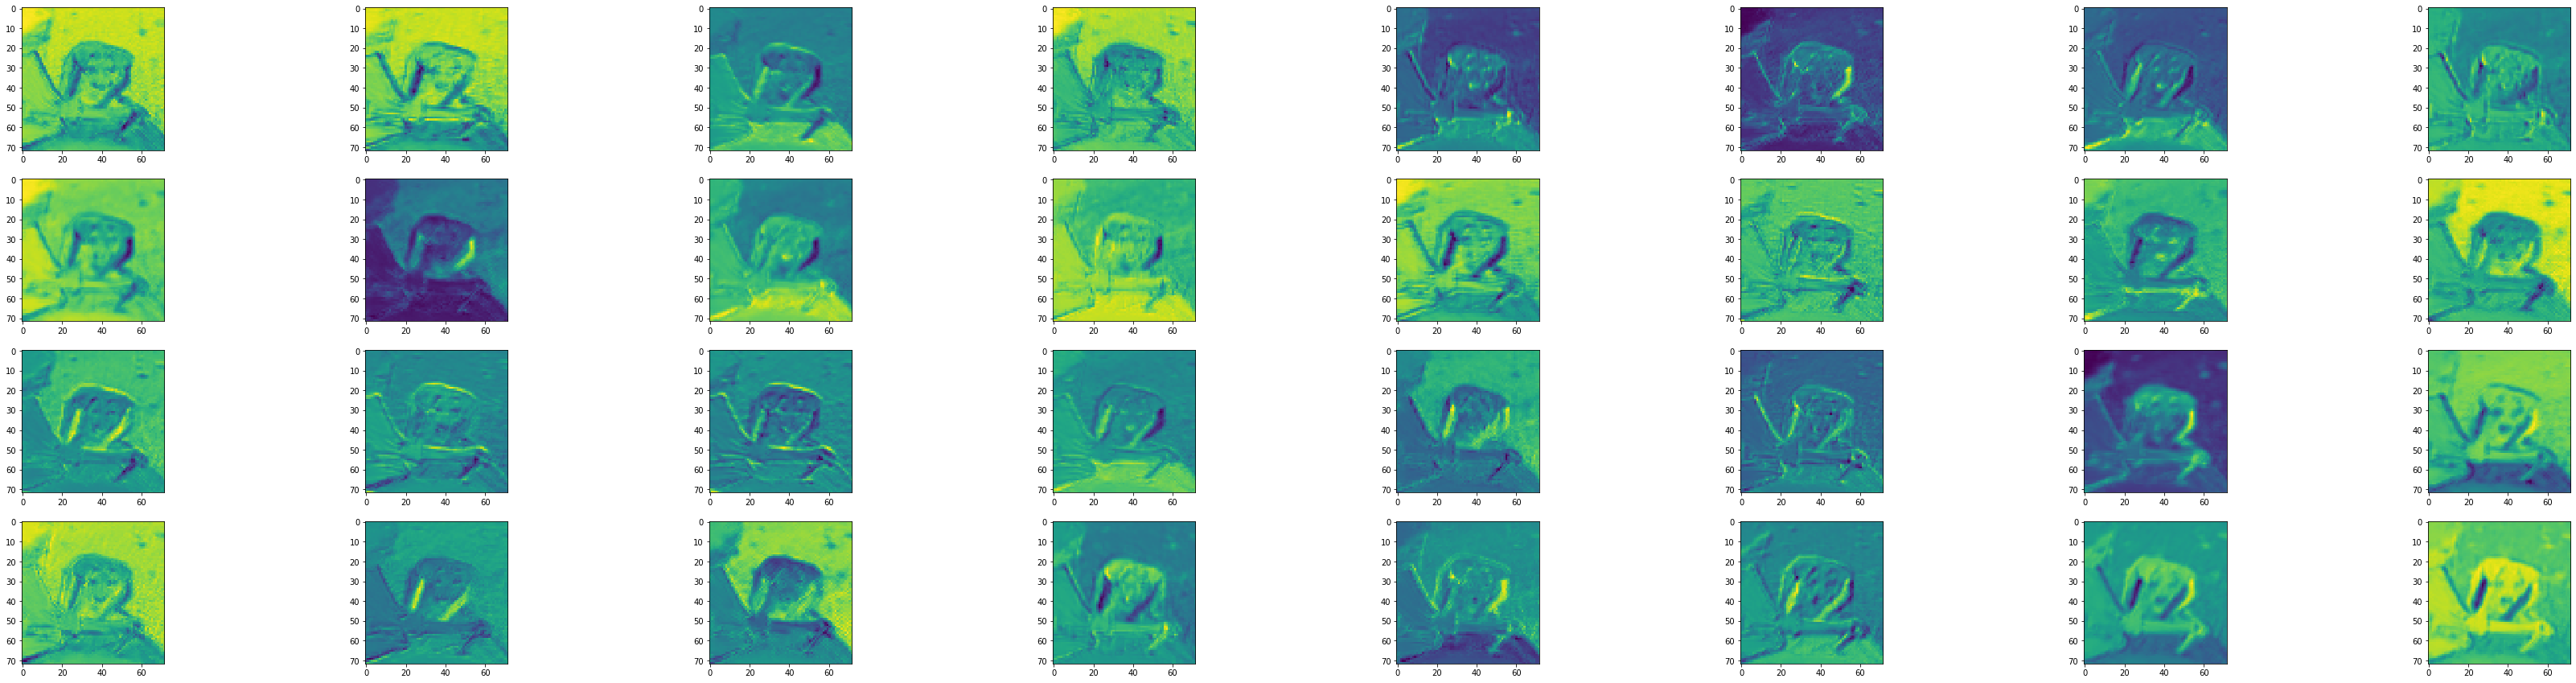

In [222]:
img_activation = activations[3]
fig, ax = plt.subplots(4,8, figsize=(60,15))
count=0
for i in range(4):
    for j in range(8):
        if count==32:
            break
        ax[i,j].imshow(img_activation[0,:,:,count])
        count=count+1

In [223]:
activations[4].shape

(1, 72, 72, 32)

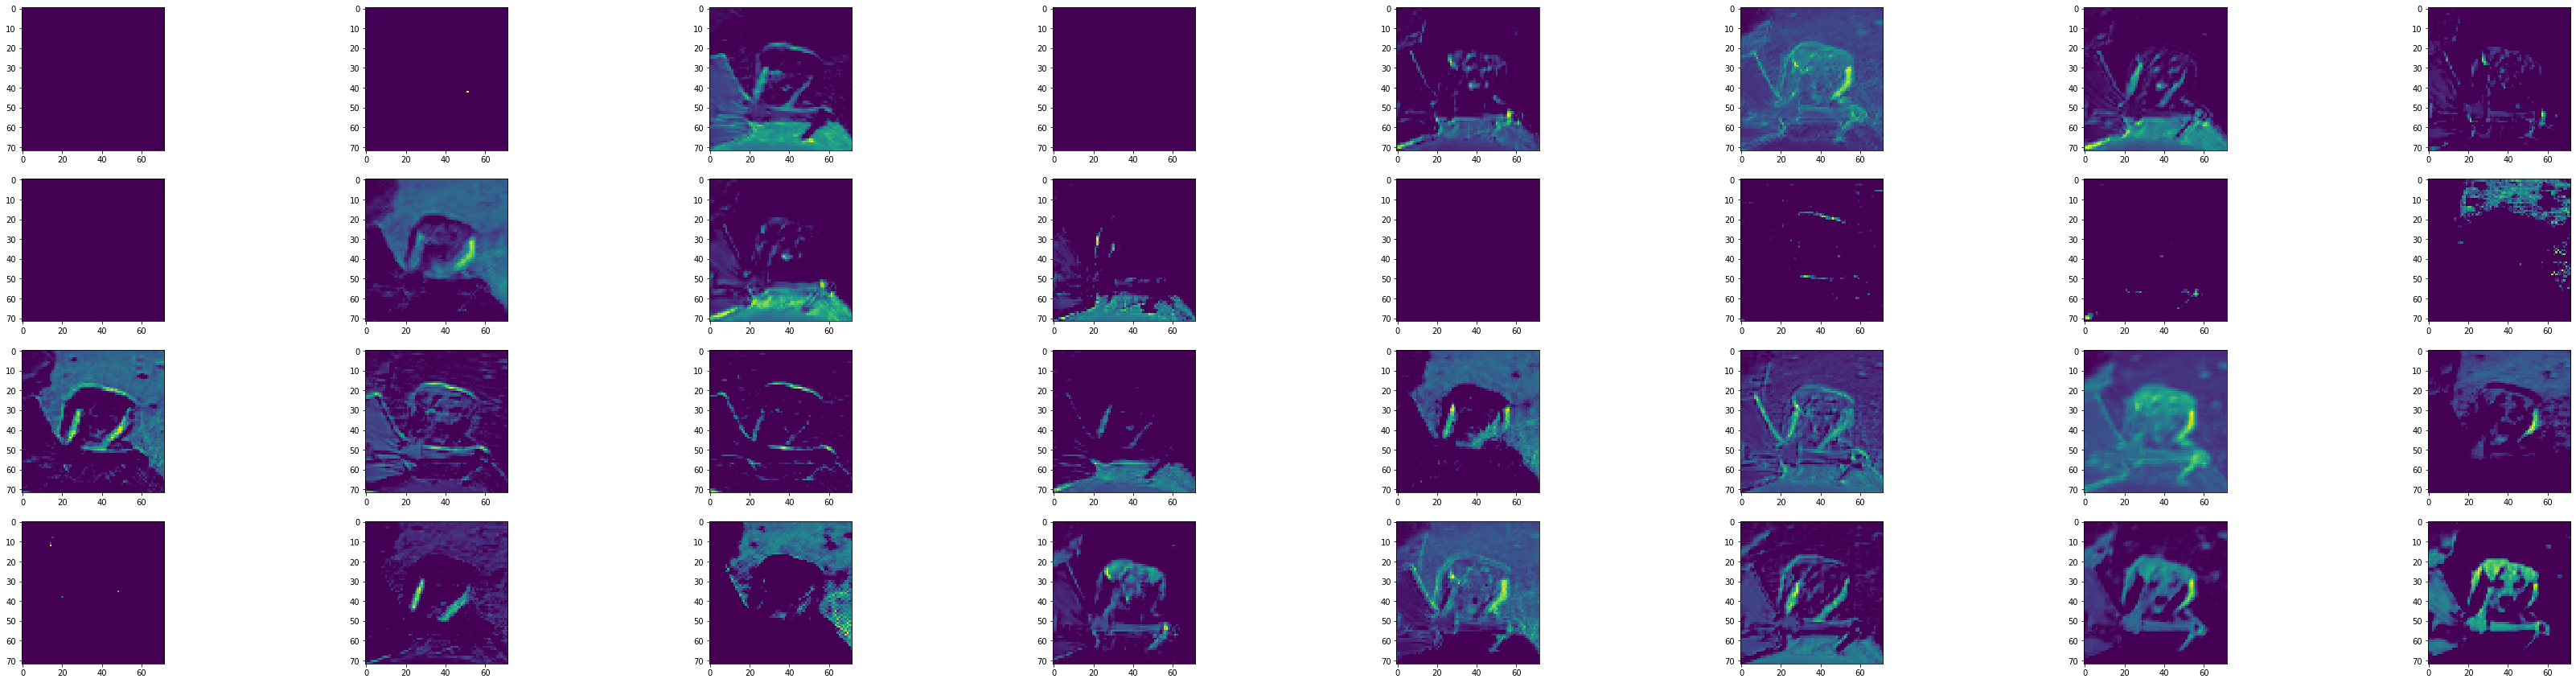

In [224]:
img_activation = activations[4]
fig, ax = plt.subplots(4,8, figsize=(60,15))
count=0
for i in range(4):
    for j in range(8):
        if count==32:
            break
        ax[i,j].imshow(img_activation[0,:,:,count])
        count=count+1

In [225]:
activations[5].shape

(1, 36, 36, 32)

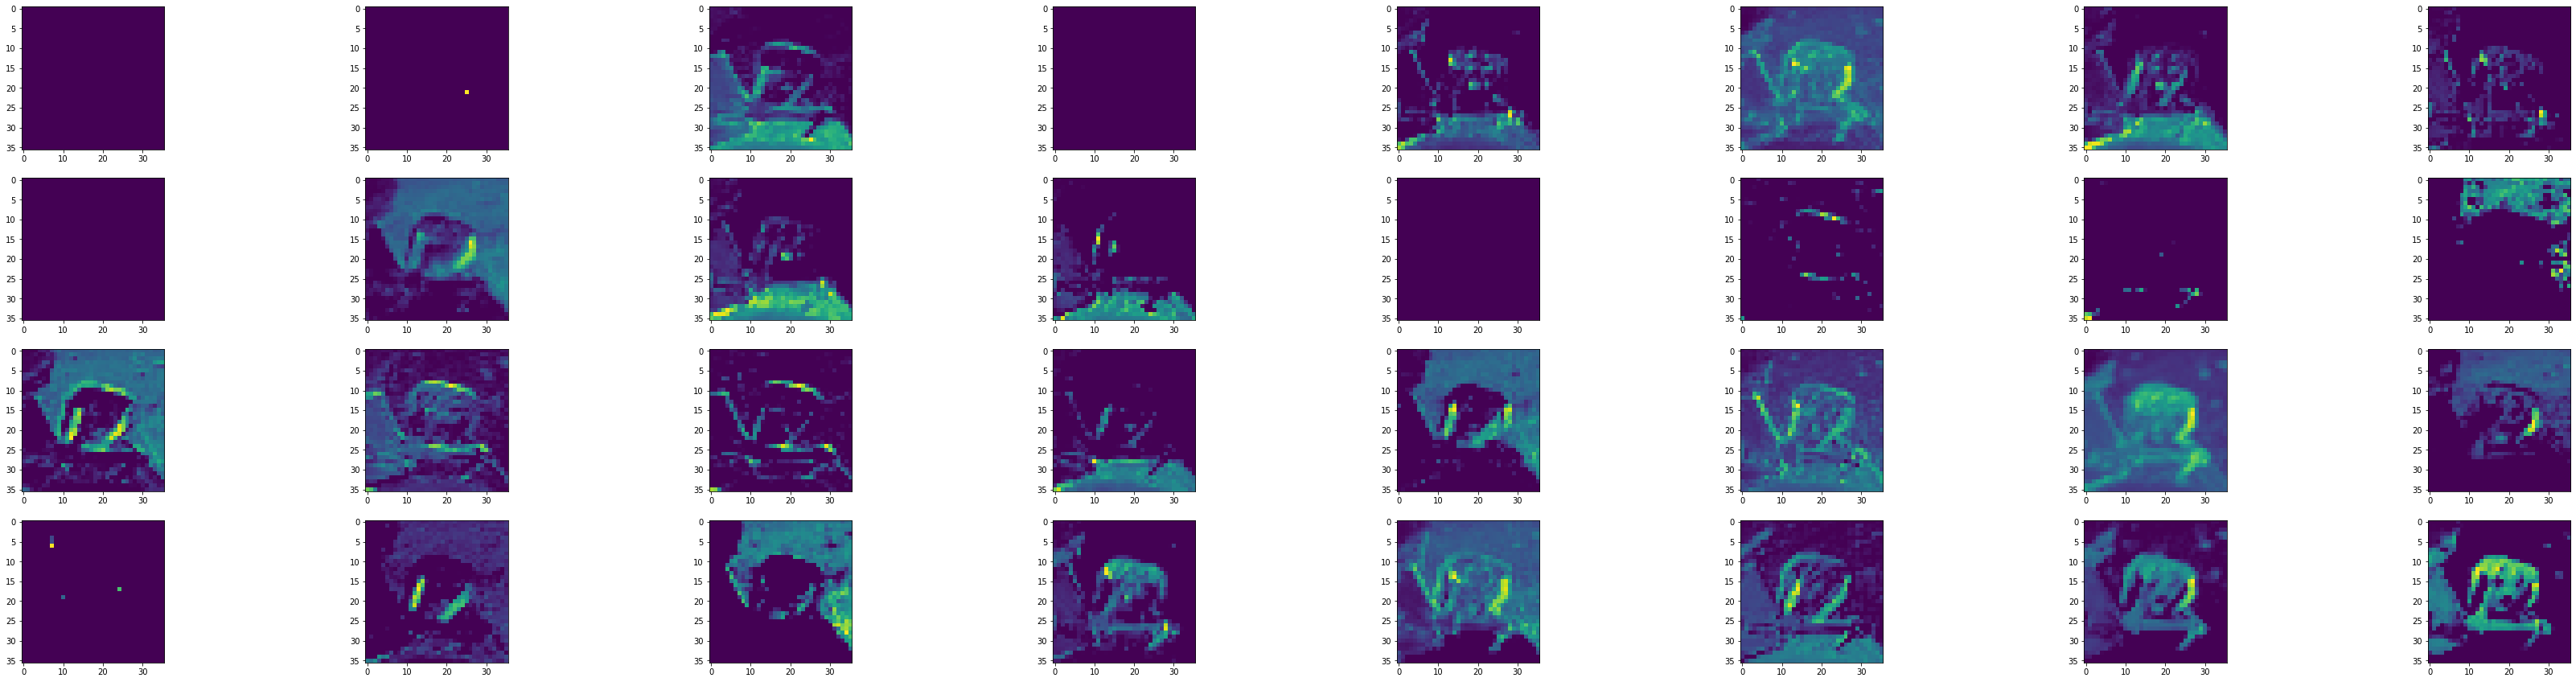

In [226]:
img_activation = activations[5]
fig, ax = plt.subplots(4,8, figsize=(60,15))
count=0
for i in range(4):
    for j in range(8):
        if count==32:
            break
        ax[i,j].imshow(img_activation[0,:,:,count])
        count=count+1

In [227]:
activations[6].shape

(1, 34, 34, 64)

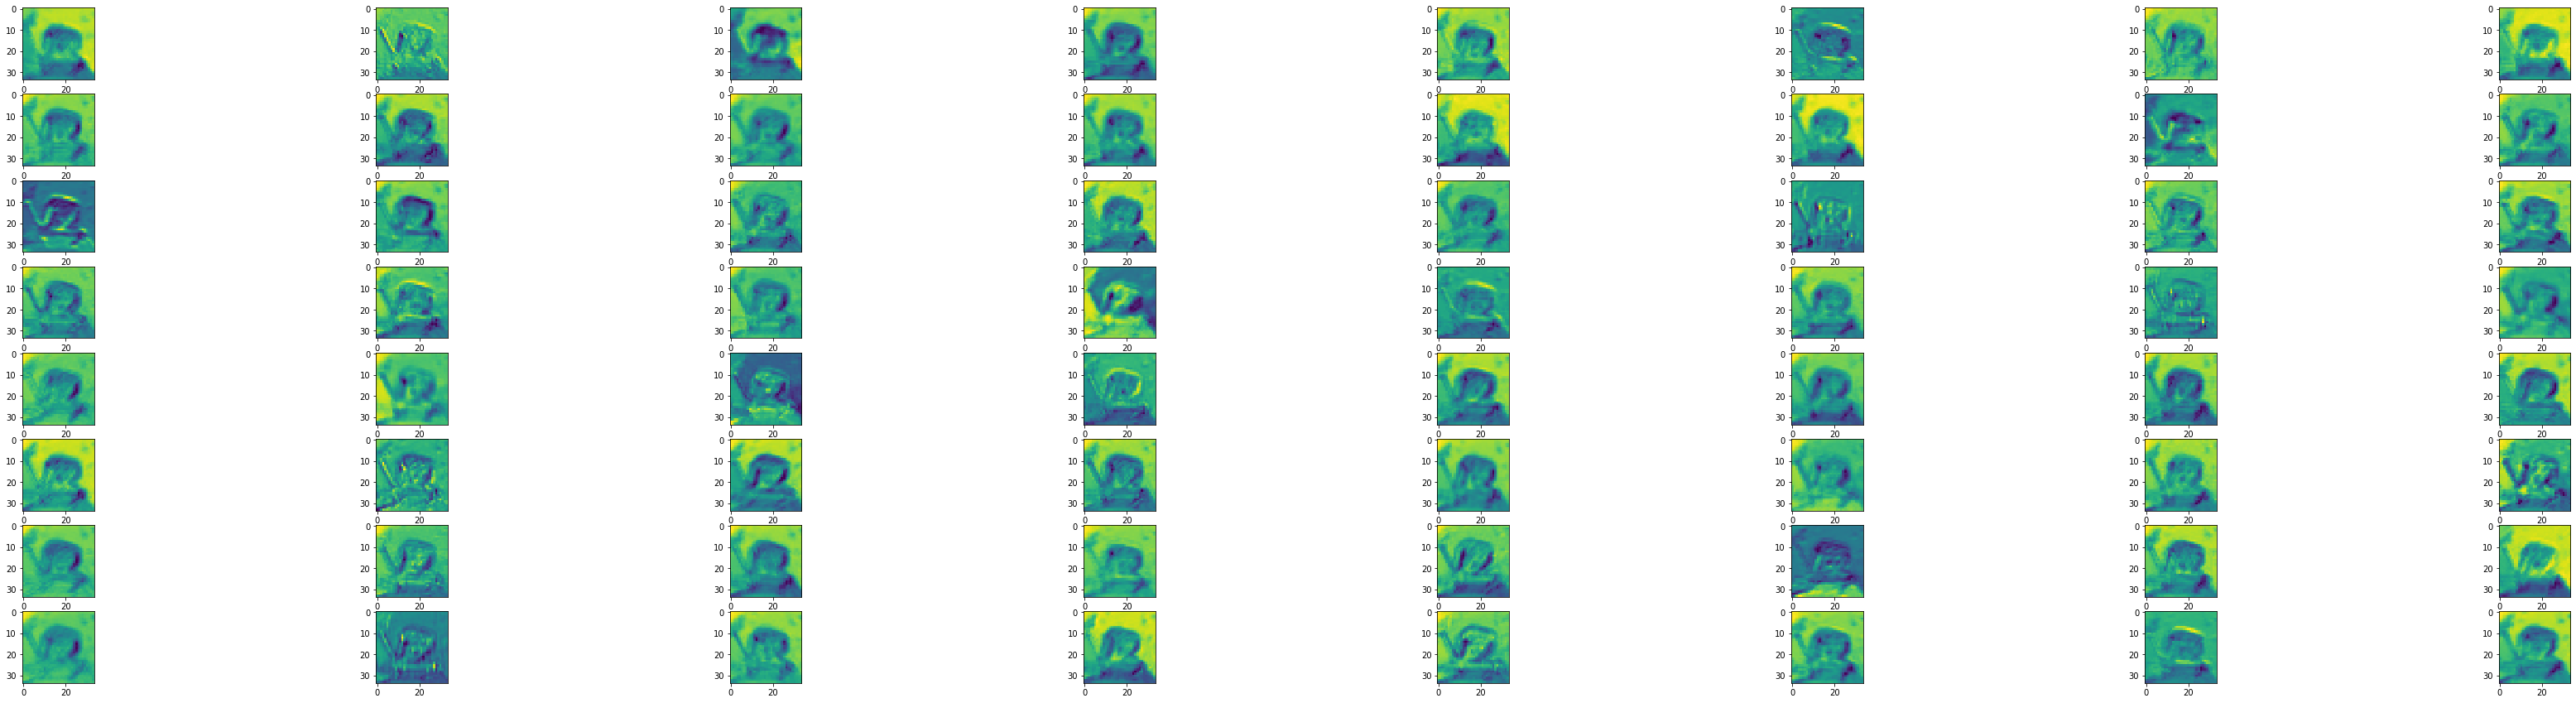

In [228]:
img_activation = activations[6]
fig, ax = plt.subplots(8,8, figsize=(60,15))
count=0
for i in range(8):
    for j in range(8):
        if count==64:
            break
        ax[i,j].imshow(img_activation[0,:,:,count])
        count=count+1

In [229]:
activations[7].shape

(1, 34, 34, 64)

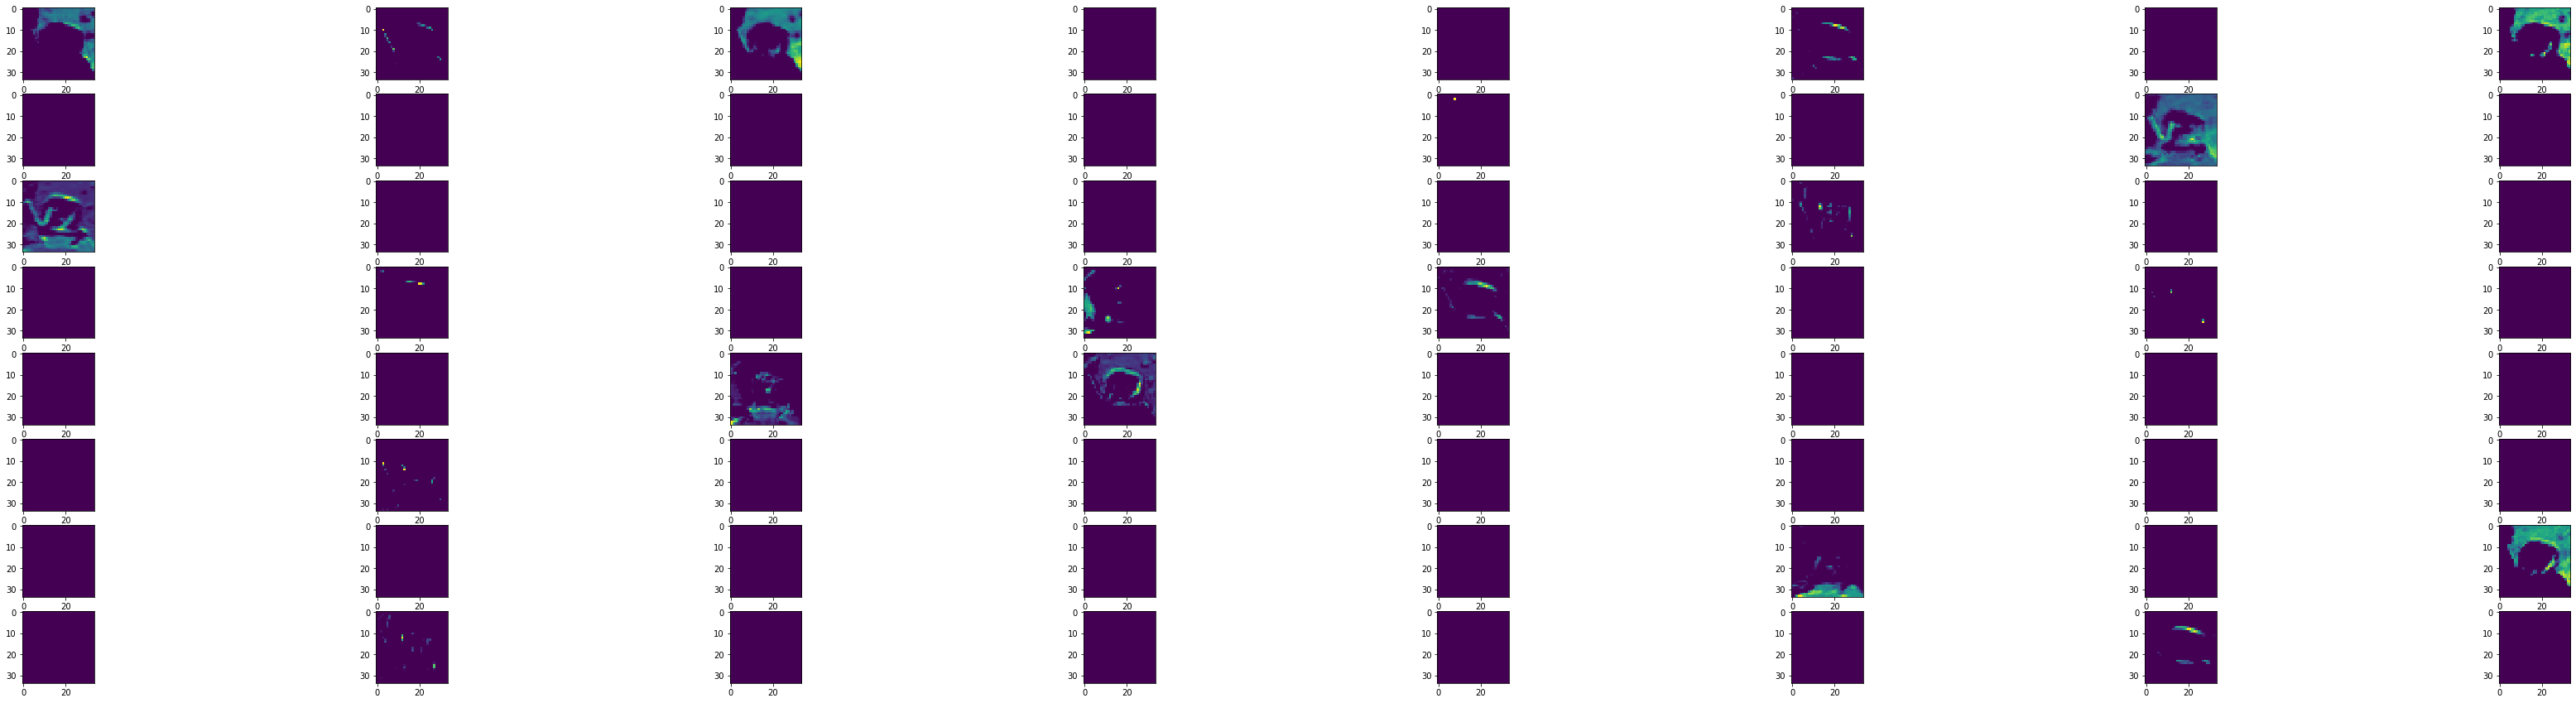

In [230]:
img_activation = activations[7]
fig, ax = plt.subplots(8,8, figsize=(60,15))
count=0
for i in range(8):
    for j in range(8):
        if count==64:
            break
        ax[i,j].imshow(img_activation[0,:,:,count])
        count=count+1